In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [ ]:
def broad_category(cat):
    if cat == 'Insufficient_Weight':
        return 'Underweight'
    elif cat == 'Normal_Weight':
        return 'Normal'
    elif cat.startswith('Overweight'):
        return 'Overweight'
    else:
        return 'Obese'

df['BroadCategory'] = df['WeightCategory'].apply(broad_category)


In [ ]:
df['MTRANS'] = df['MTRANS'].replace({'Motorbike': 'Bike'})

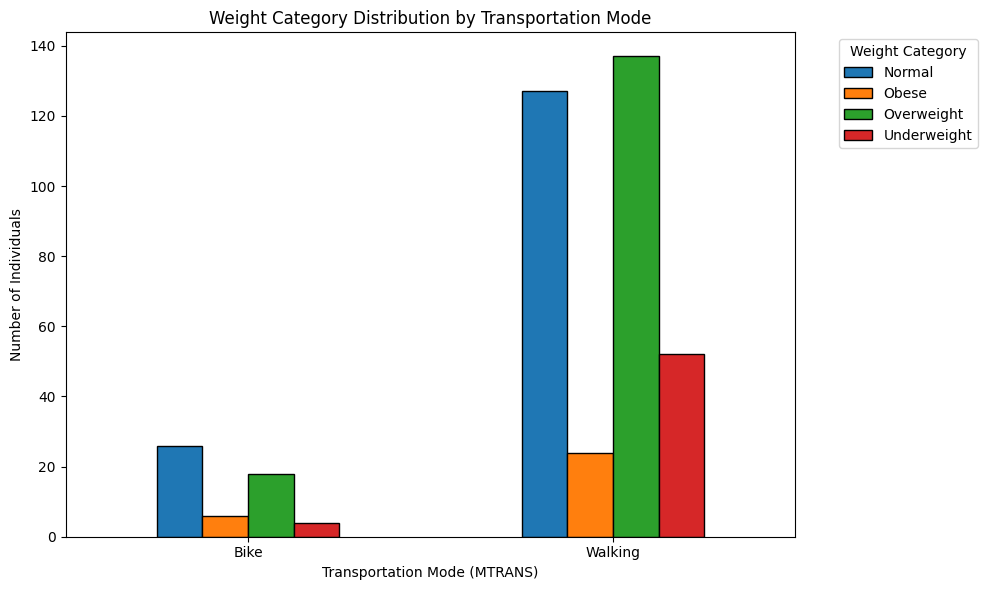

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only these four transport types
selected_trans = [ 'Walking', 'Bike']
subset = df[df['MTRANS'].isin(selected_trans)]

# Create a cross-tabulation of counts
plot_data = pd.crosstab(subset['MTRANS'], subset['BroadCategory'])

# Plot the grouped bar chart
plot_data.plot(kind='bar', figsize=(10,6), edgecolor='black')

plt.title('Weight Category Distribution by Transportation Mode')
plt.xlabel('Transportation Mode (MTRANS)')
plt.ylabel('Number of Individuals')
plt.legend(title='Weight Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


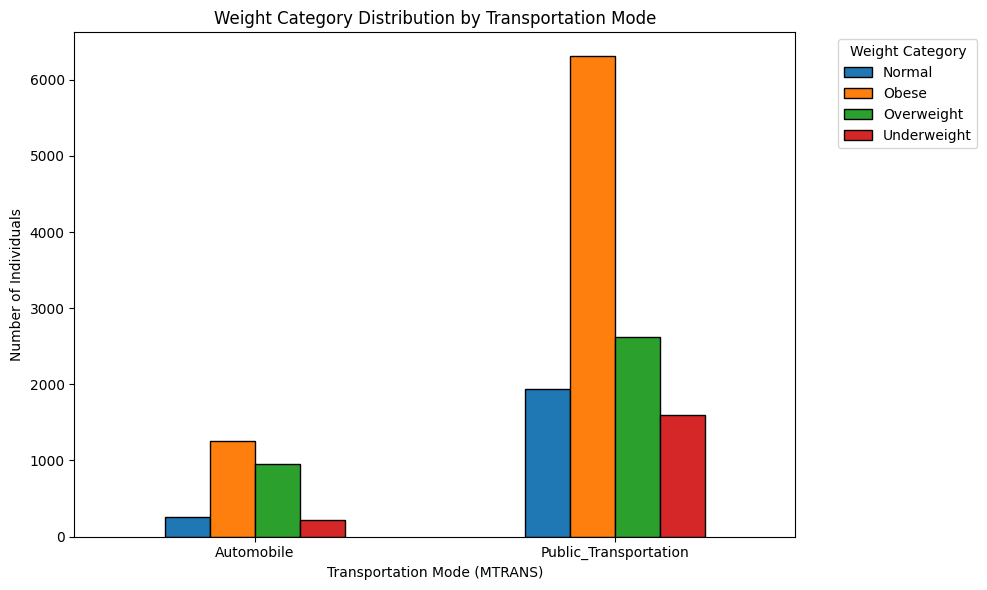

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only these four transport types
selected_trans = [ 'Public_Transportation', 'Automobile']
subset = df[df['MTRANS'].isin(selected_trans)]

# Create a cross-tabulation of counts
plot_data = pd.crosstab(subset['MTRANS'], subset['BroadCategory'])

# Plot the grouped bar chart
plot_data.plot(kind='bar', figsize=(10,6), edgecolor='black')

plt.title('Weight Category Distribution by Transportation Mode')
plt.xlabel('Transportation Mode (MTRANS)')
plt.ylabel('Number of Individuals')
plt.legend(title='Weight Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


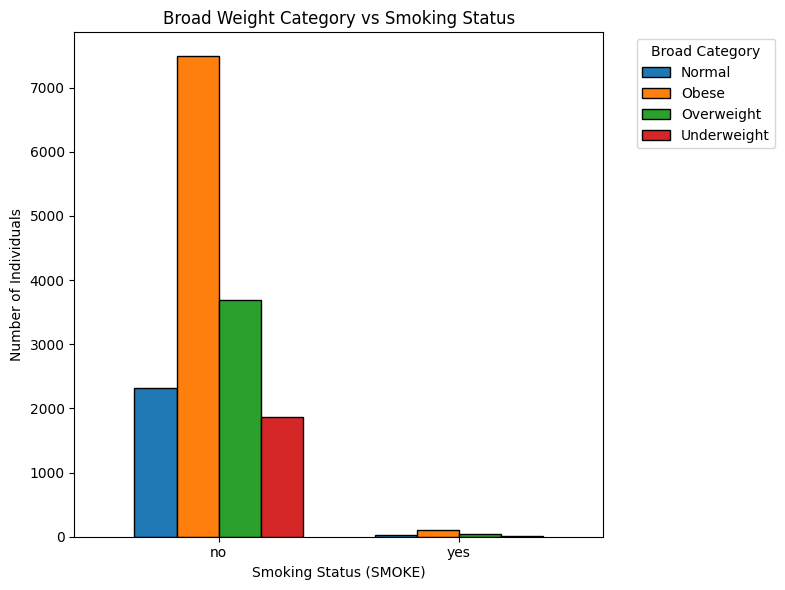

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab: counts of BroadCategory by smoking status
smoke_ct = pd.crosstab(df['SMOKE'], df['BroadCategory'])

# Plot as grouped bars
smoke_ct.plot(kind='bar', figsize=(8,6), edgecolor='black', width=0.7)

plt.title('Broad Weight Category vs Smoking Status')
plt.xlabel('Smoking Status (SMOKE)')
plt.ylabel('Number of Individuals')
plt.legend(title='Broad Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Crosstab: percentage distribution of BroadCategory within each SMOKE group
smoke_ratio = pd.crosstab(df['SMOKE'], df['BroadCategory'], normalize='index') * 100

# Round for readability
smoke_ratio = smoke_ratio.round(2)

print("Percentage distribution of BroadCategory within each SMOKE group:")
print(smoke_ratio)


Percentage distribution of BroadCategory within each SMOKE group:
BroadCategory  Normal  Obese  Overweight  Underweight
SMOKE                                                
no              15.10  48.75       24.01        12.15
yes             15.25  60.45       21.47         2.82


In [ ]:
# Count of smokers vs non-smokers
smoke_count = df['SMOKE'].value_counts()

print("Count of Smoking Status (SMOKE):")
print(smoke_count)


Count of Smoking Status (SMOKE):
SMOKE
no     15356
yes      177
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=['SMOKE'])

In [ ]:
df = df.drop(columns=['Height', 'Weight'])

In [ ]:
df['FAVC_num'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['favc_fcvc_sum'] = df['FAVC_num'] + df['FCVC']
df['favc_fcvc_mul'] = df['FAVC_num'] * df['FCVC']
df['favc_fcvc_hmean'] = 2 / ((1/(df['FAVC_num']+1e-6)) + (1/(df['FCVC']+1e-6)))  # avoid div/0


In [ ]:
df[['favc_fcvc_sum', 'favc_fcvc_mul', 'favc_fcvc_hmean', 'BMI']].corr()


,favc_fcvc_sum,favc_fcvc_mul,favc_fcvc_hmean,BMI
favc_fcvc_sum,1.000000,0.881917,0.659915,0.361973
favc_fcvc_mul,0.881917,1.000000,0.921138,0.362322
favc_fcvc_hmean,0.659915,0.921138,1.000000,0.278993
BMI,0.361973,0.362322,0.278993,1.000000


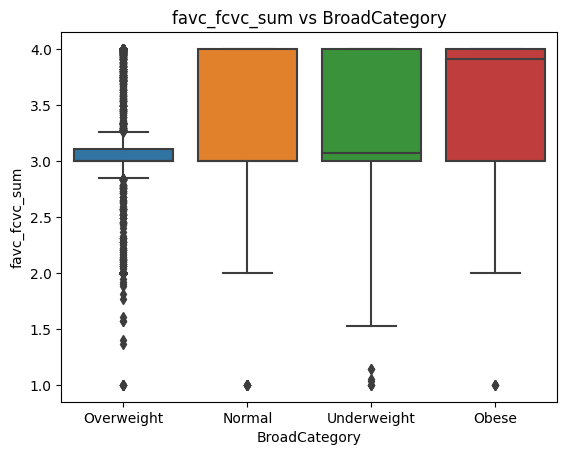

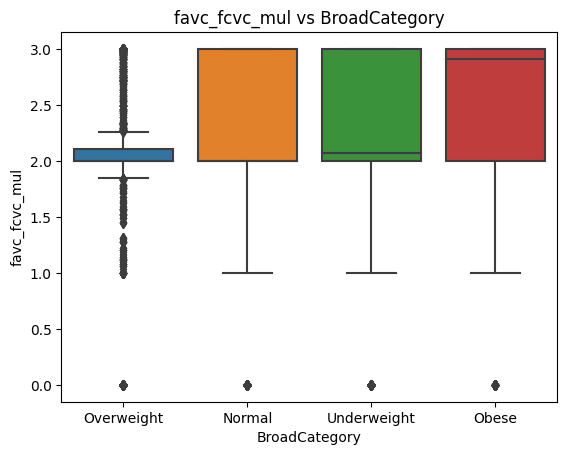

In [ ]:
sns.boxplot(x='BroadCategory', y='favc_fcvc_sum', data=df)
plt.title('favc_fcvc_sum vs BroadCategory')
plt.show()

sns.boxplot(x='BroadCategory', y='favc_fcvc_mul', data=df)
plt.title('favc_fcvc_mul vs BroadCategory')
plt.show()


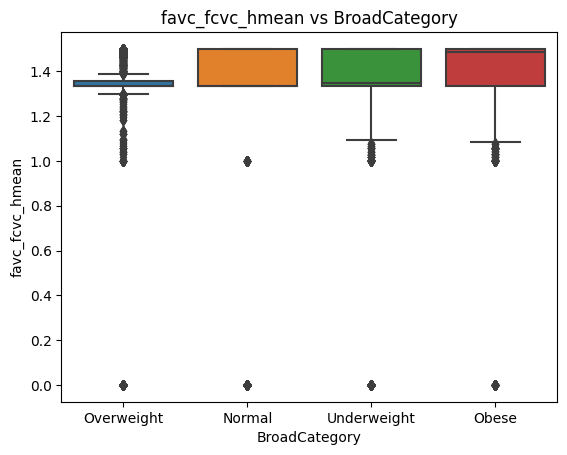

In [ ]:
sns.boxplot(x='BroadCategory', y='favc_fcvc_hmean', data=df)
plt.title('favc_fcvc_hmean vs BroadCategory')
plt.show()


In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif

X = df[['favc_fcvc_sum', 'favc_fcvc_mul', 'favc_fcvc_hmean']].fillna(0)
y = df['BroadCategory']

f_vals, _ = f_classif(X, y)
mi_vals = mutual_info_classif(X, y)

pd.DataFrame({'Feature': X.columns, 'F-value': f_vals, 'MutualInfo': mi_vals})


,Feature,F-value,MutualInfo
0,favc_fcvc_sum,612.710302,0.163835
1,favc_fcvc_mul,680.110892,0.174382
2,favc_fcvc_hmean,484.907619,0.171831


In [ ]:
df['favc_fcvc_interaction'] = df['FAVC_num'] * df['FCVC']

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'family_history_with_overweight', 'NCP', 'CAEC',
       'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'WeightCategory', 'BMI',
       'BroadCategory', 'favc_fcvc_interaction'],
      dtype='object')

In [ ]:
df = df.drop(columns=['FAVC', 'FCVC', 'favc_fcvc_sum', 'favc_fcvc_mul', 'favc_fcvc_hmean','FAVC_num'], errors='ignore')

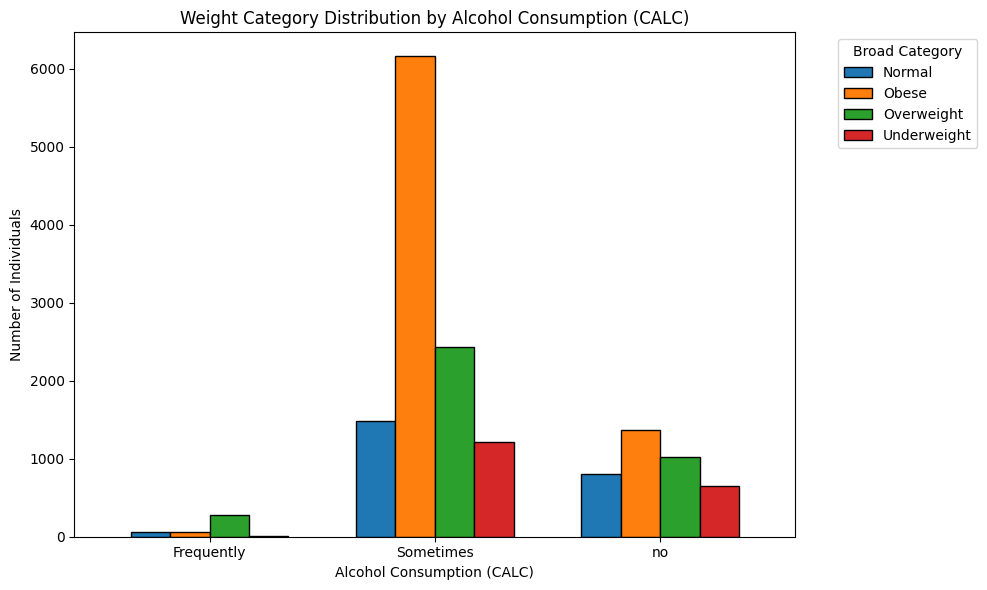

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tab of CALC vs BroadCategory
plot_data = pd.crosstab(df['CALC'], df['BroadCategory'])

# Plot grouped bar chart
plot_data.plot(kind='bar', figsize=(10,6), edgecolor='black', width=0.7)

plt.title('Weight Category Distribution by Alcohol Consumption (CALC)')
plt.xlabel('Alcohol Consumption (CALC)')
plt.ylabel('Number of Individuals')
plt.legend(title='Broad Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


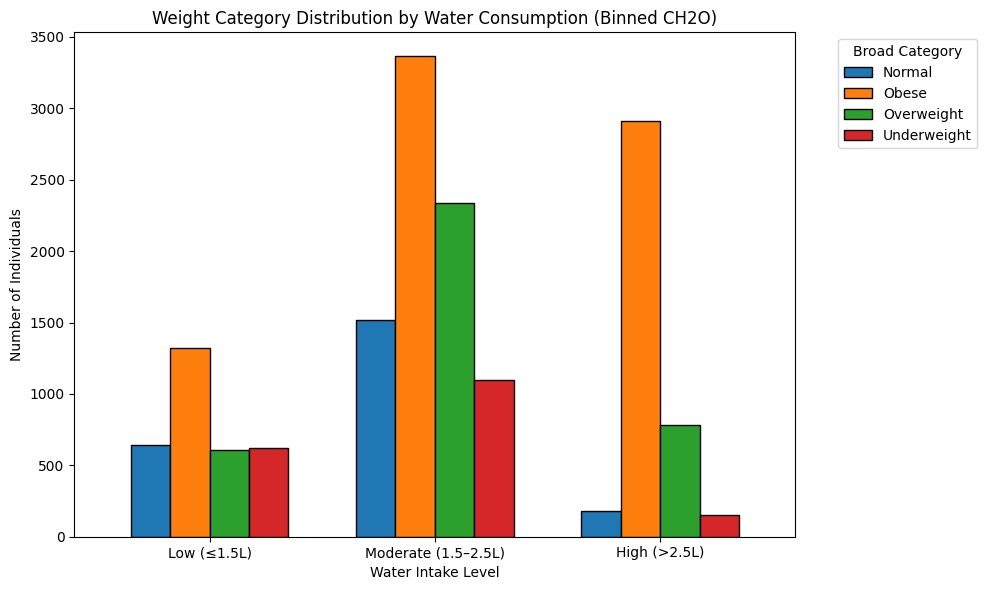

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create water-level bins for plotting
bins = [0, 1.5, 2.5, 4]  # adjust based on data spread
labels = ['Low (≤1.5L)', 'Moderate (1.5–2.5L)', 'High (>2.5L)']

df['CH2O_group'] = pd.cut(df['CH2O'], bins=bins, labels=labels)

# Cross-tab
plot_data = pd.crosstab(df['CH2O_group'], df['BroadCategory'])

# Plot
plot_data.plot(kind='bar', figsize=(10,6), edgecolor='black', width=0.7)
plt.title('Weight Category Distribution by Water Consumption (Binned CH2O)')
plt.xlabel('Water Intake Level')
plt.ylabel('Number of Individuals')
plt.legend(title='Broad Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Crosstab: percentage distribution of BroadCategory within each CALC group
calc_ratio = pd.crosstab(df['CALC'], df['BroadCategory'], normalize='index') * 100

# Round for readability
calc_ratio = calc_ratio.round(2)

print("Percentage distribution of BroadCategory within each CALC group:")
print(calc_ratio)

# Count of CALC (alcohol consumption) categories
calc_count = df['CALC'].value_counts()

print("\nCount of Alcohol Consumption (CALC):")
print(calc_count)


Percentage distribution of BroadCategory within each CALC group:
BroadCategory  Normal  Obese  Overweight  Underweight
CALC                                                 
Frequently      13.76  16.22       67.57         2.46
Sometimes       13.14  54.56       21.53        10.77
no              20.98  35.67       26.56        16.79

Count of Alcohol Consumption (CALC):
CALC
Sometimes     11285
no             3841
Frequently      407
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Crosstab: percentage distribution of BroadCategory within each CALC group, separated by Gender
calc_gender_ratio = (
    pd.crosstab([df['Gender'], df['CALC']], df['BroadCategory'], normalize='index') * 100
).round(2)

print("Percentage distribution of BroadCategory within each CALC group by Gender:")
print(calc_gender_ratio)

# Count of CALC groups per gender
calc_gender_count = df.groupby(['Gender', 'CALC']).size().reset_index(name='count')
print("\nCount of Alcohol Consumption (CALC) categories by Gender:")
print(calc_gender_count)


Percentage distribution of BroadCategory within each CALC group by Gender:
BroadCategory      Normal  Obese  Overweight  Underweight
Gender CALC                                              
Female Frequently   16.42  15.67       62.69         5.22
       Sometimes    13.17  59.20       13.83        13.80
       no           27.43  25.30       25.99        21.28
Male   Frequently   12.45  16.48       69.96         1.10
       Sometimes    13.11  49.52       29.90         7.47
       no           15.65  44.24       27.02        13.08

Count of Alcohol Consumption (CALC) categories by Gender:
   Gender        CALC  count
0  Female  Frequently    134
1  Female   Sometimes   5877
2  Female          no   1739
3    Male  Frequently    273
4    Male   Sometimes   5408
5    Male          no   2102


In [ ]:
CALC_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2
}
df['CALC_num'] = df['CALC'].map(CALC_map)
df = df.drop(columns=['CALC'])


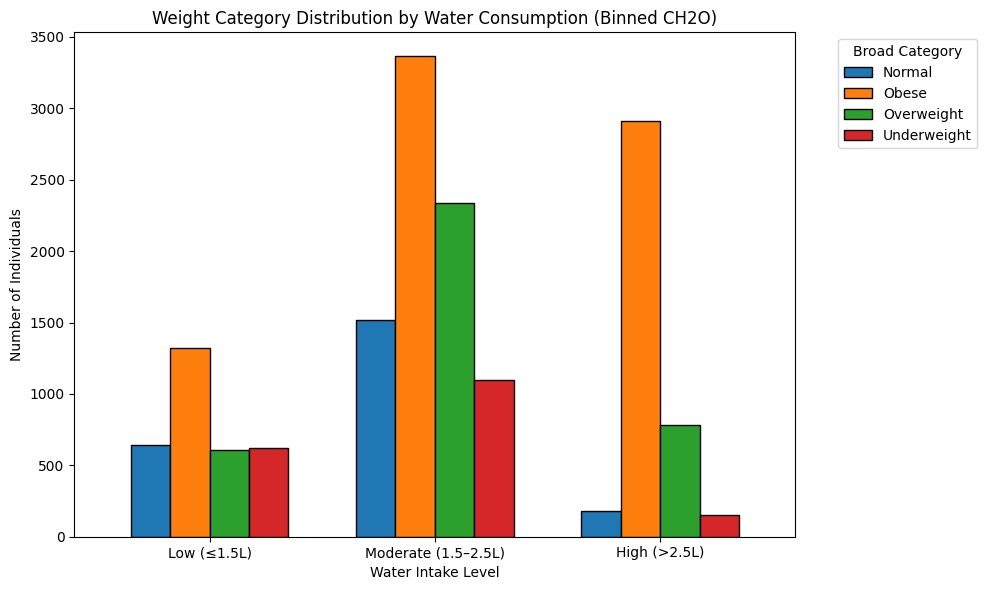

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create water-level bins for plotting
bins = [0, 1.5, 2.5, 4]  # adjust based on data spread
labels = ['Low (≤1.5L)', 'Moderate (1.5–2.5L)', 'High (>2.5L)']

df['CH2O_group'] = pd.cut(df['CH2O'], bins=bins, labels=labels)

# Cross-tab
plot_data = pd.crosstab(df['CH2O_group'], df['BroadCategory'])

# Plot
plot_data.plot(kind='bar', figsize=(10,6), edgecolor='black', width=0.7)
plt.title('Weight Category Distribution by Water Consumption (Binned CH2O)')
plt.xlabel('Water Intake Level')
plt.ylabel('Number of Individuals')
plt.legend(title='Broad Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [3]:
from sklearn.feature_selection import f_classif, mutual_info_classif
import pandas as pd

# Assuming CALC_num is your numeric alcohol variable (0=no, 1=sometimes, 2=frequently)

# Create new combined features
df['water_alcohol_sum']  = df['CH2O'] + df['CALC_num']
df['water_alcohol_mul']  = df['CH2O'] * df['CALC_num']
df['water_alcohol_hmean'] = 2 / ((1/(df['CH2O']+1e-6)) + (1/(df['CALC_num']+1e-6)))
df['div'] = (df['CH2O']) / (df['CALC_num']+1e-6)

# Compute F and Mutual Info
X = df[['water_alcohol_sum', 'water_alcohol_mul', 'water_alcohol_hmean','div']].fillna(0)
y = df['BroadCategory']

f_vals, _ = f_classif(X, y)
mi_vals = mutual_info_classif(X, y)

result = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_vals,
    'MutualInfo': mi_vals
})

print(result)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
df['liquid_balance'] = df['CH2O'] + df['CALC_num']


In [ ]:
df = df.drop(columns=['water_alcohol_sum', 'water_alcohol_mul', 'water_alcohol_hmean','CH2O','CALC_num','CH2O_group'])

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'family_history_with_overweight', 'SCC', 'FAF',
       'TUE', 'MTRANS', 'WeightCategory', 'BMI', 'BroadCategory',
       'favc_fcvc_interaction', 'liquid_balance', 'meal_balance'],
      dtype='object')

In [ ]:
caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['CAEC_num'] = df['CAEC'].map(caec_map)

In [ ]:
df['meal_snack_sum']  = df['NCP'] + df['CAEC_num']
df['meal_snack_mul']  = df['NCP'] * df['CAEC_num']
df['meal_snack_hmean'] = 2 / ((1/(df['NCP']+1e-6)) + (1/(df['CAEC_num']+1e-6)))


In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif

X = df[['meal_snack_sum', 'meal_snack_mul', 'meal_snack_hmean']].fillna(0)
y = df['BroadCategory']

f_vals, _ = f_classif(X, y)
mi_vals = mutual_info_classif(X, y)

result = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_vals,
    'MutualInfo': mi_vals
})

print(result)


            Feature     F-value  MutualInfo
0    meal_snack_sum  569.944121    0.217013
1    meal_snack_mul  844.791653    0.226156
2  meal_snack_hmean  791.924620    0.234535


In [ ]:
df['meal_balance'] = df['NCP'] * df['CAEC_num']

In [ ]:
df = df.drop(columns=['meal_snack_sum', 'meal_snack_mul', 'meal_snack_hmean','CAEC_num','NCP','CAEC'])

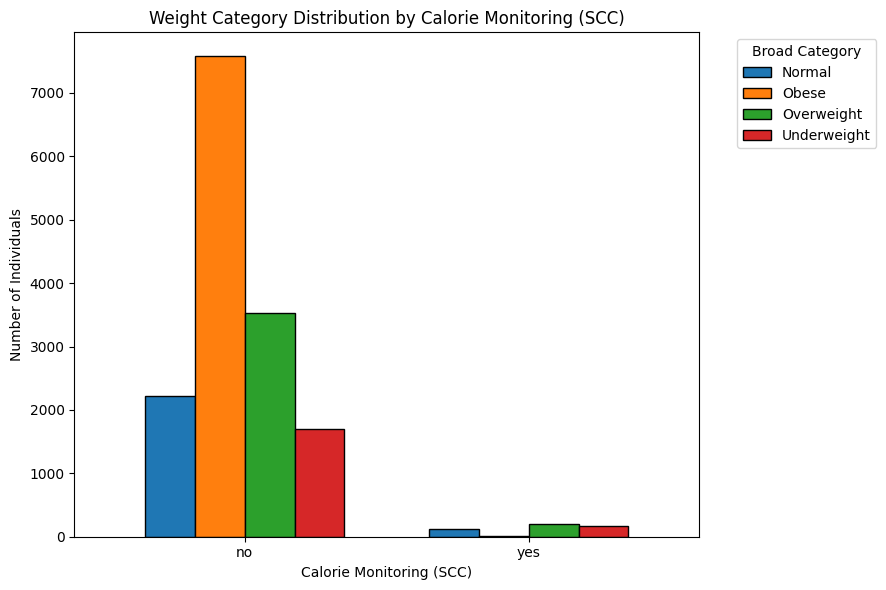

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cross-tab: counts
plot_data = pd.crosstab(df['SCC'], df['BroadCategory'])

# Plot grouped bar chart
plot_data.plot(kind='bar', figsize=(9,6), edgecolor='black', width=0.7)

plt.title('Weight Category Distribution by Calorie Monitoring (SCC)')
plt.xlabel('Calorie Monitoring (SCC)')
plt.ylabel('Number of Individuals')
plt.legend(title='Broad Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
print("SCC category counts:")
print(df['SCC'].value_counts())


SCC category counts:
SCC
no     15019
yes      514
Name: count, dtype: int64


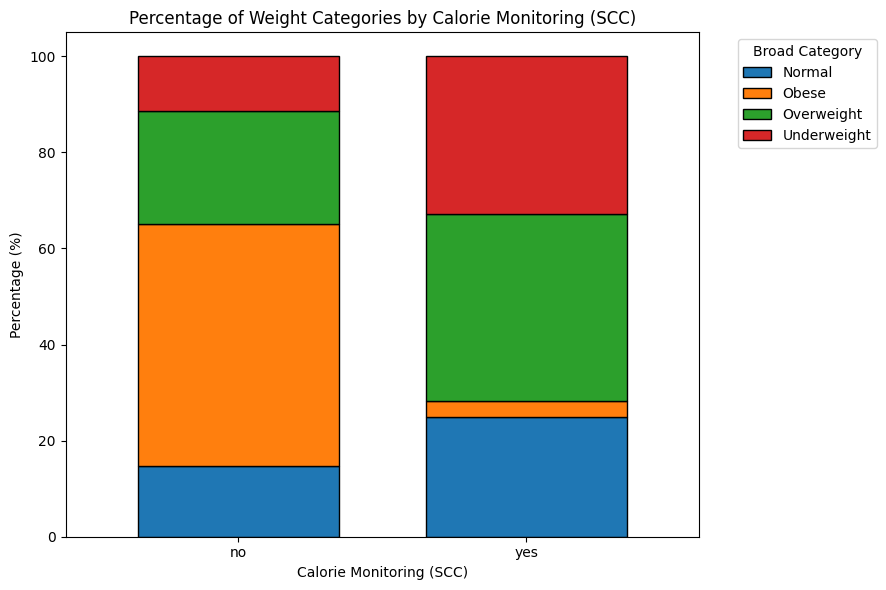

In [ ]:
# Convert to percentages
scc_ratio = (plot_data.div(plot_data.sum(axis=1), axis=0) * 100)

scc_ratio.plot(kind='bar', stacked=True, figsize=(9,6), edgecolor='black', width=0.7)

plt.title('Percentage of Weight Categories by Calorie Monitoring (SCC)')
plt.xlabel('Calorie Monitoring (SCC)')
plt.ylabel('Percentage (%)')
plt.legend(title='Broad Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df['SCC_num'] = df['SCC'].map({'no': 0, 'yes': 1})
df = df.drop(columns=['SCC'])

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'family_history_with_overweight', 'FAF', 'TUE',
       'MTRANS', 'WeightCategory', 'BMI', 'BroadCategory',
       'favc_fcvc_interaction', 'liquid_balance', 'meal_balance', 'SCC_num'],
      dtype='object')

In [ ]:
df['activity_balance'] = df['FAF'] / (df['TUE'] + 1e-6)

In [ ]:
import numpy as np

df['activity_diff'] = df['FAF'] - df['TUE']
df['activity_ratio'] = df['FAF'] / (df['TUE'] + 1e-6)
df['activity_logratio'] = np.log1p(df['FAF'] / (df['TUE'] + 1e-6))

# Prepare feature matrix and target
X = df[['activity_diff', 'activity_ratio', 'activity_logratio']].fillna(0)
y = df['BroadCategory']

# Compute F-values and Mutual Info
f_vals, _ = f_classif(X, y)
mi_vals = mutual_info_classif(X, y)

# Combine results into a DataFrame
result = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_vals,
    'MutualInfo': mi_vals
})

print(result)

             Feature     F-value  MutualInfo
0      activity_diff   71.167484    0.268393
1     activity_ratio  179.016782    0.234242
2  activity_logratio  146.979344    0.236545


In [ ]:
df[['FAF', 'TUE', 'activity_balance']].corr()


,FAF,TUE,activity_balance
FAF,1.000000,0.014926,0.448327
TUE,0.014926,1.000000,-0.531987
activity_balance,0.448327,-0.531987,1.000000


In [ ]:
df = df.drop(columns=['activity_diff','activity_ratio','activity_logratio','TUE'])

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'family_history_with_overweight', 'FAF',
       'MTRANS', 'WeightCategory', 'BMI', 'BroadCategory',
       'favc_fcvc_interaction', 'liquid_balance', 'meal_balance', 'SCC_num',
       'activity_balance'],
      dtype='object')

In [ ]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})


In [ ]:
df.head()

,id,Gender,Age,family_history_with_overweight,FAF,MTRANS,WeightCategory,BMI,BroadCategory,favc_fcvc_interaction,liquid_balance,meal_balance,SCC_num,activity_balance
0,0,Male,24.443011,1,0.000000,Public_Transportation,Overweight_Level_II,28.259565,Overweight,2.000000,3.763573,2.983297,0,0.000000
1,1,Female,18.000000,1,1.000000,Automobile,Normal_Weight,23.422091,Normal,2.000000,2.000000,6.000000,0,0.999999
2,2,Female,18.000000,1,0.866045,Public_Transportation,Insufficient_Weight,17.126706,Underweight,1.880534,1.910378,1.411685,0,0.517479
3,3,Female,20.952737,1,1.467863,Public_Transportation,Obesity_Type_III,44.855798,Obese,3.000000,2.674061,3.000000,0,1.881393
4,4,Male,31.641081,1,1.967973,Public_Transportation,Overweight_Level_II,25.599151,Overweight,2.679664,2.979848,1.971472,0,2.112189


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# -------------------------------------------------------------------
# Targets & broad mapper
# -------------------------------------------------------------------
ORDER = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

def to_broad(cat: str) -> str:
    if cat == 'Insufficient_Weight':
        return 'Underweight'
    if cat == 'Normal_Weight':
        return 'Normal'
    if cat.startswith('Overweight'):
        return 'Overweight'
    return 'Obese'  # all Obesity_* go here

# -------------------------------------------------------------------
# Assumes df already contains these columns after your FE step:
# ['id','Gender','Age','family_history_with_overweight','FAF','MTRANS',
#  'WeightCategory','BMI','BroadCategory','favc_fcvc_interaction',
#  'liquid_balance','meal_balance','SCC_num','activity_balance']
# If BroadCategory not present, create it:
# df['BroadCategory'] = df['WeightCategory'].apply(to_broad)
# -------------------------------------------------------------------

# Split by gender
def gender_slice(df_, gender_value):
    return df_[df_['Gender'] == gender_value].copy()

male_df   = gender_slice(df, 'Male')
female_df = gender_slice(df, 'Female')

# -----------------------------
# Feature lists (NEW)
# -----------------------------
# Categorical left in your list: only MTRANS
cat_cols = ['MTRANS']

# All other engineered/kept columns are numeric
num_cols = [
    'Age', 'BMI', 'FAF',
    'family_history_with_overweight',  # already 0/1
    'favc_fcvc_interaction',
    'liquid_balance',
    'meal_balance',
    'SCC_num',
    'activity_balance'
]

FEATURES = cat_cols + num_cols

def make_preprocess():
    return ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols),
            ('num', Pipeline(steps=[('imp', SimpleImputer(strategy='median'))]), num_cols),
        ],
        remainder='drop'
    )

def make_broad_pipeline():
    return Pipeline(steps=[
        ('prep', make_preprocess()),
        ('clf', RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1))
    ])

def make_over_pipeline():
    return Pipeline(steps=[
        ('prep', make_preprocess()),
        ('clf', RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1, class_weight='balanced'))
    ])

def make_obese_pipeline():
    return Pipeline(steps=[
        ('prep', make_preprocess()),
        ('clf', RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1, class_weight='balanced'))
    ])


In [ ]:
# -----------------------------
# Training per gender (Stage-1 then Stage-2)
# -----------------------------
def train_hierarchical_for_gender(gdf):
    # fresh, independent pipelines
    broad_pipe = make_broad_pipeline()
    over_pipe  = make_over_pipeline()
    obese_pipe = make_obese_pipeline()

    # === Stage 1: Broad ===
    X = gdf.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
    y_broad = gdf['BroadCategory']

    missing = set(FEATURES) - set(X.columns)
    if missing:
        raise ValueError(f"Missing required feature columns: {missing}")

    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y_broad, test_size=0.2, stratify=y_broad, random_state=42
    )
    broad_pipe.fit(X_tr, y_tr)
    y_pred_broad = broad_pipe.predict(X_te)
    broad_acc = accuracy_score(y_te, y_pred_broad)
    print("\n=== Stage 1 (Broad) ===")
    print(classification_report(y_te, y_pred_broad))
    print("Broad Accuracy:", round(broad_acc, 4))

    # === Stage 2: Overweight (I vs II) ===
    over_labels = ['Overweight_Level_I', 'Overweight_Level_II']
    over_df = gdf[(gdf['BroadCategory']=='Overweight') & (gdf['WeightCategory'].isin(over_labels))].copy()
    over_acc = None
    if len(over_df) > 1 and over_df['WeightCategory'].nunique() == 2:
        X_over = over_df.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
        y_over = over_df['WeightCategory']
        Xo_tr, Xo_te, yo_tr, yo_te = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=42)
        over_pipe.fit(Xo_tr, yo_tr)
        yo_pred = over_pipe.predict(Xo_te)
        over_acc = accuracy_score(yo_te, yo_pred)
        print("\n=== Stage 2 (Overweight: I vs II) ===")
        print(classification_report(yo_te, yo_pred, labels=over_labels, target_names=over_labels))
        print("Overweight Accuracy:", round(over_acc, 4))
    else:
        print("\n=== Stage 2 (Overweight) ===")
        print("Not enough variation to train (need both Level I and Level II).")

    # === Stage 2: Obese (Type I/II/III) ===
    obese_labels = ['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
    obese_df = gdf[(gdf['BroadCategory']=='Obese') & (gdf['WeightCategory'].isin(obese_labels))].copy()
    obese_acc = None
    if len(obese_df) > 1 and obese_df['WeightCategory'].nunique() >= 2:
        X_ob = obese_df.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
        y_ob = obese_df['WeightCategory']
        Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(X_ob, y_ob, test_size=0.2, stratify=y_ob, random_state=42)
        obese_pipe.fit(Xb_tr, yb_tr)
        yb_pred = obese_pipe.predict(Xb_te)
        present = [c for c in obese_labels if c in yb_te.unique()]
        obese_acc = accuracy_score(yb_te, yb_pred)
        print("\n=== Stage 2 (Obese: I/II/III) ===")
        print(classification_report(yb_te, yb_pred, labels=present, target_names=present))
        print("Obese Accuracy:", round(obese_acc, 4))
    else:
        print("\n=== Stage 2 (Obese) ===")
        print("Not enough variation to train (need at least two Obesity types).")

    return broad_pipe, over_pipe, obese_pipe, broad_acc, over_acc, obese_acc


In [ ]:
# -----------------------------
# Train models per gender
# -----------------------------
print("------ MALE MODELS ------")
male_broad, male_over, male_obese, male_broad_acc, male_over_acc, male_obese_acc = \
    train_hierarchical_for_gender(male_df)

print("\n\n------ FEMALE MODELS ------")
female_broad, female_over, female_obese, female_broad_acc, female_over_acc, female_obese_acc = \
    train_hierarchical_for_gender(female_df)

print("\n=== Summary ===")
print(f"Male   -> Broad: {male_broad_acc:.3f}, Over: {male_over_acc}, Obese: {male_obese_acc}")
print(f"Female -> Broad: {female_broad_acc:.3f}, Over: {female_over_acc}, Obese: {female_obese_acc}")

------ MALE MODELS ------

=== Stage 1 (Broad) ===
              precision    recall  f1-score   support

      Normal       0.86      0.87      0.86       215
       Obese       0.97      0.95      0.96       731
  Overweight       0.90      0.91      0.90       475
 Underweight       0.89      0.92      0.91       136

    accuracy                           0.92      1557
   macro avg       0.90      0.91      0.91      1557
weighted avg       0.92      0.92      0.92      1557

Broad Accuracy: 0.9242

=== Stage 2 (Overweight: I vs II) ===
                     precision    recall  f1-score   support

 Overweight_Level_I       0.84      0.82      0.83       211
Overweight_Level_II       0.86      0.88      0.87       265

           accuracy                           0.86       476
          macro avg       0.85      0.85      0.85       476
       weighted avg       0.85      0.86      0.85       476

Overweight Accuracy: 0.855

=== Stage 2 (Obese: I/II/III) ===
                  pre

C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)


=== Stage 1 (Broad) ===
              precision    recall  f1-score   support

      Normal       0.87      0.87      0.87       255
       Obese       0.98      0.97      0.97       788
  Overweight       0.85      0.87      0.86       270
 Underweight       0.94      0.94      0.94       237

    accuracy                           0.93      1550
   macro avg       0.91      0.91      0.91      1550
weighted avg       0.93      0.93      0.93      1550

Broad Accuracy: 0.9303

=== Stage 2 (Overweight: I vs II) ===
                     precision    recall  f1-score   support

 Overweight_Level_I       0.87      0.81      0.84       159
Overweight_Level_II       0.75      0.82      0.78       111

           accuracy                           0.81       270
          macro avg       0.81      0.82      0.81       270
       weighted avg       0.82      0.81      0.82       270

Overweight Accuracy: 0.8148

=== Stage 2 (Obese: I/II/III) ===
                  precision    recall  f1-scor

C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
gender_weight_ct = pd.crosstab(df['Gender'], df['WeightCategory'])
print(gender_weight_ct)


WeightCategory  Insufficient_Weight  Normal_Weight  Obesity_Type_I   
Gender                                                               
Female                         1188           1273             955  \
Male                            682           1072            1252   

WeightCategory  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I   
Gender                                                                  
Female                        6              2979                 793  \
Male                       2397                 4                1051   

WeightCategory  Overweight_Level_II  
Gender                               
Female                          556  
Male                           1325  


In [ ]:
from sklearn.utils import resample

def upsample_minority(df, target_col):
    # Find class counts
    counts = df[target_col].value_counts()
    max_count = counts.max()
    balanced_parts = []
    
    for label, subset in df.groupby(target_col):
        if len(subset) < max_count:
            subset_up = resample(subset,
                                 replace=True,           # sample with replacement
                                 n_samples=max_count,    # match majority size
                                 random_state=42)
            balanced_parts.append(subset_up)
        else:
            balanced_parts.append(subset)
    return pd.concat(balanced_parts)


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'family_history_with_overweight', 'FAF',
       'MTRANS', 'WeightCategory', 'BMI', 'BroadCategory',
       'favc_fcvc_interaction', 'liquid_balance', 'meal_balance', 'SCC_num',
       'activity_balance'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample

from xgboost import XGBClassifier

# --------------------------
# Feature lists
# --------------------------
cat_cols = ['MTRANS']  # only categorical you kept
num_cols = [
    'Age','BMI','FAF',
    'family_history_with_overweight',  # 0/1
    'favc_fcvc_interaction',
    'liquid_balance',
    'meal_balance',
    'SCC_num',
    'activity_balance'
]
FEATURES = cat_cols + num_cols

def to_broad(cat: str) -> str:
    if cat == 'Insufficient_Weight':
        return 'Underweight'
    if cat == 'Normal_Weight':
        return 'Normal'
    if cat.startswith('Overweight'):
        return 'Overweight'
    return 'Obese'

# If not already present
if 'BroadCategory' not in df.columns:
    df['BroadCategory'] = df['WeightCategory'].apply(to_broad)

# --------------------------
# Preprocessor
# --------------------------
def make_preprocess():
    return ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols),
            ('num', SimpleImputer(strategy='median'), num_cols)
        ],
        remainder='drop'
    )

# --------------------------
# Helpers
# --------------------------
def upsample_train_only(X_tr, y_tr, random_state=42):
    """Upsample the minority classes inside the training split ONLY."""
    # Recombine for resampling
    tr = X_tr.copy()
    tr['__y__'] = y_tr.values
    counts = tr['__y__'].value_counts()
    max_count = counts.max()
    parts = []
    for cls, grp in tr.groupby('__y__'):
        if len(grp) < max_count:
            grp_up = resample(grp, replace=True, n_samples=max_count, random_state=random_state)
            parts.append(grp_up)
        else:
            parts.append(grp)
    tr_up = pd.concat(parts, axis=0).sample(frac=1.0, random_state=random_state)  # shuffle
    y_up = tr_up['__y__']
    X_up = tr_up.drop(columns='__y__')
    return X_up, y_up

def class_sample_weights(y):
    """Return per-sample weights inversely proportional to class frequency."""
    classes = np.unique(y)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
    w_map = {c:w for c, w in zip(classes, weights)}
    return y.map(w_map).astype(float)

def xgb_default(num_classes):
    return XGBClassifier(
        # tree/optimization
        n_estimators=1200,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1.0,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        reg_alpha=0.0,
        objective='multi:softprob' if num_classes > 2 else 'binary:logistic',
        eval_metric='mlogloss' if num_classes > 2 else 'logloss',
        tree_method='hist',
        random_state=42,
        n_jobs=-1
    )

def fit_with_early_stopping(pipe, X_tr, y_tr, X_va, y_va, sample_weight=None):
    """
    Fit a Pipeline(preprocess -> xgb) with early stopping.
    We need to manually transform X_va with the preprocess to use eval_set.
    """
    # Fit preprocess on train, transform train & valid
    prep = pipe.named_steps['prep']
    xgb = pipe.named_steps['xgb']

    X_tr_enc = prep.fit_transform(X_tr, y_tr)
    X_va_enc = prep.transform(X_va)

    # Fit XGB with eval_set for early stopping
    xgb.fit(
        X_tr_enc, y_tr,
        sample_weight=sample_weight,
        eval_set=[(X_va_enc, y_va)],
        verbose=False,
        early_stopping_rounds=50
    )
    return pipe  # preprocess is fitted; xgb is fitted

# --------------------------
# Per-gender hierarchical training with XGBoost
# --------------------------
def train_hierarchical_xgb_for_gender(gdf):
    # Sanity
    X_all = gdf.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
    missing = set(FEATURES) - set(X_all.columns)
    if missing:
        raise ValueError(f"Missing required feature columns: {missing}")

    # ---------------- Stage 1: Broad ----------------
    y_broad = gdf['BroadCategory']
    X_tr, X_va, y_tr, y_va = train_test_split(
        X_all, y_broad, test_size=0.2, stratify=y_broad, random_state=42
    )

    # (Optionally) no upsampling here if fairly balanced; if needed, enable:
    # X_tr, y_tr = upsample_train_only(X_tr, y_tr)

    broad_pipe = Pipeline([
        ('prep', make_preprocess()),
        ('xgb', xgb_default(num_classes=y_broad.nunique()))
    ])
    # Per-sample weights for imbalance
    sw_broad = class_sample_weights(y_tr)
    broad_pipe = fit_with_early_stopping(broad_pipe, X_tr, y_tr, X_va, y_va, sample_weight=sw_broad)

    y_pred_b = broad_pipe.predict(X_va)
    acc_broad = accuracy_score(y_va, y_pred_b)
    print("\n=== Stage 1 (Broad, XGB) ===")
    print(classification_report(y_va, y_pred_b))
    print("Broad Accuracy:", round(acc_broad, 4))

    # ---------------- Stage 2: Overweight (I vs II) ----------------
    ow_labels = ['Overweight_Level_I', 'Overweight_Level_II']
    over_df = gdf[(gdf['BroadCategory']=='Overweight') & (gdf['WeightCategory'].isin(ow_labels))].copy()
    acc_over = None
    over_pipe = None
    if len(over_df) > 1 and over_df['WeightCategory'].nunique() == 2:
        X_over = over_df.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
        y_over = over_df['WeightCategory']
        Xo_tr, Xo_va, yo_tr, yo_va = train_test_split(
            X_over, y_over, test_size=0.2, stratify=y_over, random_state=42
        )
        # Upsample training only
        Xo_tr, yo_tr = upsample_train_only(Xo_tr, yo_tr)
        # Weights
        sw_over = class_sample_weights(yo_tr)

        over_pipe = Pipeline([
            ('prep', make_preprocess()),
            ('xgb', xgb_default(num_classes=2))
        ])
        over_pipe = fit_with_early_stopping(over_pipe, Xo_tr, yo_tr, Xo_va, yo_va, sample_weight=sw_over)

        yo_pred = over_pipe.predict(Xo_va)
        acc_over = accuracy_score(yo_va, yo_pred)
        print("\n=== Stage 2 (Overweight I vs II, XGB) ===")
        print(classification_report(yo_va, yo_pred, labels=ow_labels, target_names=ow_labels))
        print("Overweight Accuracy:", round(acc_over, 4))
    else:
        print("\n=== Stage 2 (Overweight) ===")
        print("Not enough variation to train (need both Level I and Level II).")

    # ---------------- Stage 2: Obese (I/II/III) ----------------
    ob_labels = ['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
    obese_df = gdf[(gdf['BroadCategory']=='Obese') & (gdf['WeightCategory'].isin(ob_labels))].copy()
    acc_obese = None
    obese_pipe = None
    if len(obese_df) > 1 and obese_df['WeightCategory'].nunique() >= 2:
        X_ob = obese_df.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
        y_ob = obese_df['WeightCategory']
        Xb_tr, Xb_va, yb_tr, yb_va = train_test_split(
            X_ob, y_ob, test_size=0.2, stratify=y_ob, random_state=42
        )
        # Upsample training only
        Xb_tr, yb_tr = upsample_train_only(Xb_tr, yb_tr)
        # Weights
        sw_ob = class_sample_weights(yb_tr)

        obese_pipe = Pipeline([
            ('prep', make_preprocess()),
            ('xgb', xgb_default(num_classes=yb_tr.nunique()))
        ])
        obese_pipe = fit_with_early_stopping(obese_pipe, Xb_tr, yb_tr, Xb_va, yb_va, sample_weight=sw_ob)

        yb_pred = obese_pipe.predict(Xb_va)
        acc_obese = accuracy_score(yb_va, yb_pred)
        present = [c for c in ob_labels if c in yb_va.unique()]
        print("\n=== Stage 2 (Obese I/II/III, XGB) ===")
        print(classification_report(yb_va, yb_pred, labels=present, target_names=present))
        print("Obese Accuracy:", round(acc_obese, 4))
    else:
        print("\n=== Stage 2 (Obese) ===")
        print("Not enough variation to train (need at least two Obesity types).")

    return broad_pipe, over_pipe, obese_pipe, acc_broad, acc_over, acc_obese

# --------------------------
# Train per gender
# --------------------------
male_df   = df[df['Gender']=='Male'].copy()
female_df = df[df['Gender']=='Female'].copy()

print("------ MALE (XGB) ------")
male_broad, male_over, male_obese, male_broad_acc, male_over_acc, male_obese_acc = \
    train_hierarchical_xgb_for_gender(male_df)

print("\n\n------ FEMALE (XGB) ------")
female_broad, female_over, female_obese, female_broad_acc, female_over_acc, female_obese_acc = \
    train_hierarchical_xgb_for_gender(female_df)

print("\n=== Summary ===")
print(f"Male   -> Broad: {male_broad_acc:.3f}, Over: {male_over_acc}, Obese: {male_obese_acc}")
print(f"Female -> Broad: {female_broad_acc:.3f}, Over: {female_over_acc}, Obese: {female_obese_acc}")


------ MALE (XGB) ------


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Normal' 'Obese' 'Overweight' 'Underweight']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def class_sample_weights_encoded(y_enc):
    classes = np.unique(y_enc)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_enc)
    w_map = {c:w for c, w in zip(classes, weights)}
    return np.array([w_map[c] for c in y_enc], dtype=float)


In [ ]:
# =========================
# 0) Imports
# =========================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight

from xgboost import XGBClassifier

# =========================
# 1) Config / helpers
# =========================
# Final submission label order reference (not strictly needed by XGB, kept for clarity)
ORDER = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

def to_broad(cat: str) -> str:
    if cat == 'Insufficient_Weight':
        return 'Underweight'
    if cat == 'Normal_Weight':
        return 'Normal'
    if cat.startswith('Overweight'):
        return 'Overweight'
    return 'Obese'

# If missing, create BroadCategory for training df
if 'BroadCategory' not in df.columns and 'WeightCategory' in df.columns:
    df['BroadCategory'] = df['WeightCategory'].apply(to_broad)

# Features (match exactly your current columns)
cat_cols = ['MTRANS']
num_cols = [
    'Age', 'BMI', 'FAF',
    'family_history_with_overweight',   # 0/1 already
    'favc_fcvc_interaction',
    'liquid_balance',
    'meal_balance',
    'SCC_num',
    'activity_balance'
]
FEATURES = cat_cols + num_cols

def make_preprocess():
    return ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols),
            ('num', SimpleImputer(strategy='median'), num_cols),
        ],
        remainder='drop'
    )

def xgb_default(num_classes):
    return XGBClassifier(
        n_estimators=1200,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1.0,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        reg_alpha=0.0,
        objective='multi:softprob' if num_classes > 2 else 'binary:logistic',
        eval_metric='mlogloss' if num_classes > 2 else 'logloss',
        tree_method='hist',
        random_state=42,
        n_jobs=-1
    )

def upsample_train_only(X_tr, y_tr, random_state=42):
    """Upsample minority classes inside the *training* fold only."""
    tmp = X_tr.copy()
    tmp['__y__'] = y_tr.values
    max_n = tmp['__y__'].value_counts().max()
    parts = []
    for cls, grp in tmp.groupby('__y__'):
        if len(grp) < max_n:
            grp = resample(grp, replace=True, n_samples=max_n, random_state=random_state)
        parts.append(grp)
    up = pd.concat(parts).sample(frac=1.0, random_state=random_state)
    y_up = up['__y__']
    X_up = up.drop(columns='__y__')
    return X_up, y_up

def class_sample_weights_encoded(y_enc):
    """Return per-sample weights based on inverse class frequency, for encoded labels."""
    classes = np.unique(y_enc)
    weights = compute_class_weight('balanced', classes=classes, y=y_enc)
    wmap = {c: w for c, w in zip(classes, weights)}
    return np.array([wmap[c] for c in y_enc], dtype=float)

# Fit XGB with early stopping using preprocessed (encoded) matrices
def fit_with_early_stopping(prep, xgb, X_tr, y_tr_enc, X_va, y_va_enc, sample_weight=None):
    Xtr_enc = prep.fit_transform(X_tr, y_tr_enc)
    Xva_enc = prep.transform(X_va)
    xgb.fit(
        Xtr_enc, y_tr_enc,
        sample_weight=sample_weight,
        eval_set=[(Xva_enc, y_va_enc)],
        early_stopping_rounds=50,
        verbose=False
    )
    return prep, xgb

# =========================
# 2) Per-gender hierarchical XGB training
# =========================
def train_hierarchical_xgb_for_gender(gdf):
    # Sanity check features
    X_all = gdf.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
    missing = set(FEATURES) - set(X_all.columns)
    if missing:
        raise ValueError(f"Missing required feature columns: {missing}")

    # ---------- Stage 1: Broad ----------
    y_broad = gdf['BroadCategory']
    X_tr, X_va, y_tr, y_va = train_test_split(X_all, y_broad, test_size=0.2, stratify=y_broad, random_state=42)

    # Encode labels
    le_broad = LabelEncoder().fit(y_tr)
    y_tr_enc = le_broad.transform(y_tr)
    y_va_enc = le_broad.transform(y_va)

    prep_b = make_preprocess()
    xgb_b  = xgb_default(num_classes=len(le_broad.classes_))

    sw_broad = class_sample_weights_encoded(y_tr_enc)
    prep_b, xgb_b = fit_with_early_stopping(prep_b, xgb_b, X_tr, y_tr_enc, X_va, y_va_enc, sample_weight=sw_broad)

    # Evaluate
    y_pred_b_enc = xgb_b.predict(prep_b.transform(X_va))
    y_pred_b     = le_broad.inverse_transform(y_pred_b_enc.astype(int))
    acc_broad = accuracy_score(y_va, y_pred_b)
    print("\n=== Stage 1 (Broad, XGB) ===")
    print(classification_report(y_va, y_pred_b, labels=le_broad.classes_, target_names=le_broad.classes_))
    print("Broad Accuracy:", round(acc_broad, 4))

    # ---------- Stage 2: Overweight (I vs II) ----------
    over_labels = ['Overweight_Level_I', 'Overweight_Level_II']
    over_df = gdf[(gdf['BroadCategory']=='Overweight') & (gdf['WeightCategory'].isin(over_labels))].copy()
    acc_over, prep_o, xgb_o, le_over, over_majority = None, None, None, None, None

    if len(over_df) > 1 and over_df['WeightCategory'].nunique() == 2:
        X_over = over_df.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
        y_over = over_df['WeightCategory']
        Xo_tr, Xo_va, yo_tr, yo_va = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=42)

        # Upsample training only
        Xo_tr, yo_tr = upsample_train_only(Xo_tr, yo_tr)

        # Encode
        le_over = LabelEncoder().fit(yo_tr)
        yo_tr_enc = le_over.transform(yo_tr)
        yo_va_enc = le_over.transform(yo_va)

        prep_o = make_preprocess()
        xgb_o  = xgb_default(num_classes=len(le_over.classes_))
        sw_over = class_sample_weights_encoded(yo_tr_enc)
        prep_o, xgb_o = fit_with_early_stopping(prep_o, xgb_o, Xo_tr, yo_tr_enc, Xo_va, yo_va_enc, sample_weight=sw_over)

        yo_pred_enc = xgb_o.predict(prep_o.transform(Xo_va))
        yo_pred = le_over.inverse_transform(yo_pred_enc.astype(int))
        acc_over = accuracy_score(yo_va, yo_pred)
        print("\n=== Stage 2 (Overweight I vs II, XGB) ===")
        print(classification_report(yo_va, yo_pred, labels=le_over.classes_, target_names=le_over.classes_))
        print("Overweight Accuracy:", round(acc_over, 4))
    else:
        # keep majority fallback if submodel isn't trained
        if len(over_df) > 0:
            over_majority = over_df['WeightCategory'].mode()[0]
        print("\n=== Stage 2 (Overweight) ===")
        print("Not enough variation to train (need both Level I and Level II).")

    # ---------- Stage 2: Obese (I/II/III) ----------
    obese_labels = ['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
    obese_df = gdf[(gdf['BroadCategory']=='Obese') & (gdf['WeightCategory'].isin(obese_labels))].copy()
    acc_ob, prep_b2, xgb_b2, le_ob, obese_majority = None, None, None, None, None

    if len(obese_df) > 1 and obese_df['WeightCategory'].nunique() >= 2:
        X_ob = obese_df.drop(columns=['id','Gender','WeightCategory','BroadCategory'], errors='ignore')
        y_ob = obese_df['WeightCategory']
        Xb_tr, Xb_va, yb_tr, yb_va = train_test_split(X_ob, y_ob, test_size=0.2, stratify=y_ob, random_state=42)

        # Upsample training only
        Xb_tr, yb_tr = upsample_train_only(Xb_tr, yb_tr)

        # Encode
        le_ob = LabelEncoder().fit(yb_tr)
        yb_tr_enc = le_ob.transform(yb_tr)
        yb_va_enc = le_ob.transform(yb_va)

        prep_b2 = make_preprocess()
        xgb_b2  = xgb_default(num_classes=len(le_ob.classes_))
        sw_ob = class_sample_weights_encoded(yb_tr_enc)
        prep_b2, xgb_b2 = fit_with_early_stopping(prep_b2, xgb_b2, Xb_tr, yb_tr_enc, Xb_va, yb_va_enc, sample_weight=sw_ob)

        yb_pred_enc = xgb_b2.predict(prep_b2.transform(Xb_va))
        yb_pred = le_ob.inverse_transform(yb_pred_enc.astype(int))
        acc_ob = accuracy_score(yb_va, yb_pred)
        present = le_ob.classes_
        print("\n=== Stage 2 (Obese I/II/III, XGB) ===")
        print(classification_report(yb_va, yb_pred, labels=present, target_names=present))
        print("Obese Accuracy:", round(acc_ob, 4))
    else:
        if len(obese_df) > 0:
            obese_majority = obese_df['WeightCategory'].mode()[0]
        print("\n=== Stage 2 (Obese) ===")
        print("Not enough variation to train (need at least two Obesity types).")

    # Pack everything needed for inference for this gender
    bundle = {
        'prep_broad': prep_b, 'xgb_broad': xgb_b, 'le_broad': le_broad,
        'prep_over':  prep_o, 'xgb_over':  xgb_o, 'le_over':  le_over,  'over_majority':  over_majority,
        'prep_obese': prep_b2,'xgb_obese': xgb_b2,'le_ob':   le_ob,     'obese_majority': obese_majority
    }
    return bundle, acc_broad, acc_over, acc_ob

# =========================
# 3) Train per gender
# =========================
male_df   = df[df['Gender']=='Male'].copy()
female_df = df[df['Gender']=='Female'].copy()

print("------ MALE (XGB) ------")
male_bundle, male_broad_acc, male_over_acc, male_obese_acc = train_hierarchical_xgb_for_gender(male_df)

print("\n\n------ FEMALE (XGB) ------")
female_bundle, female_broad_acc, female_over_acc, female_obese_acc = train_hierarchical_xgb_for_gender(female_df)

print("\n=== Summary ===")
print(f"Male   -> Broad: {male_broad_acc:.3f}, Over: {male_over_acc}, Obese: {male_obese_acc}")
print(f"Female -> Broad: {female_broad_acc:.3f}, Over: {female_over_acc}, Obese: {female_obese_acc}")

# =========================
# 4) Inference on test + submission
# =========================
def predict_row(row, bundle):
    """
    Route a single row through Broad -> (Over/Obese submodel).
    `bundle` is the dict returned for a given gender.
    """
    # Ensure a DataFrame
    X = row.to_frame().T[FEATURES]

    # Stage 1
    pb, xb, leb = bundle['prep_broad'], bundle['xgb_broad'], bundle['le_broad']
    broad_enc = xb.predict(pb.transform(X))[0]
    broad = leb.inverse_transform([int(broad_enc)])[0]

    if broad == 'Overweight':
        # Use Over submodel if present, else fallback
        if bundle['xgb_over'] is not None:
            po, xo, leo = bundle['prep_over'], bundle['xgb_over'], bundle['le_over']
            pred_enc = xo.predict(po.transform(X))[0]
            return leo.inverse_transform([int(pred_enc)])[0]
        else:
            return bundle['over_majority'] or 'Overweight_Level_I'
    elif broad == 'Obese':
        if bundle['xgb_obese'] is not None:
            pz, xz, lez = bundle['prep_obese'], bundle['xgb_obese'], bundle['le_ob']
            pred_enc = xz.predict(pz.transform(X))[0]
            return lez.inverse_transform([int(pred_enc)])[0]
        else:
            return bundle['obese_majority'] or 'Obesity_Type_I'
    elif broad == 'Underweight':
        return 'Insufficient_Weight'
    else:
        return 'Normal_Weight'

# Build predictions for whole test set
def build_submission(test_df, male_bundle, female_bundle, filename='sample_submission.csv'):
    # Sanity: ensure all features are present
    missing = set(FEATURES) - set(test_df.columns)
    if missing:
        raise ValueError(f"Test is missing required feature columns: {missing}")

    preds = []
    for i, row in test_df.iterrows():
        # choose gender bundle
        if row['Gender'] == 'Male':
            pred = predict_row(row.drop(labels=['id','Gender'], errors='ignore'), male_bundle)
        else:
            pred = predict_row(row.drop(labels=['id','Gender'], errors='ignore'), female_bundle)
        preds.append((row['id'], pred))

    sub = pd.DataFrame(preds, columns=['id','WeightCategory'])
    sub.to_csv(filename, index=False)
    return sub

# IMPORTANT: test must have the same engineered feature columns already created!
# e.g., ensure test['favc_fcvc_interaction'], test['liquid_balance'], test['meal_balance'],
# test['SCC_num'], test['activity_balance'] exist.

submission = build_submission(test, male_bundle, female_bundle, filename='sample_submission.csv')
print("\nSaved:", 'sample_submission.csv')
print(submission.head())


------ MALE (XGB) ------


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



=== Stage 1 (Broad, XGB) ===
              precision    recall  f1-score   support

      Normal       0.82      0.88      0.85       215
       Obese       0.97      0.95      0.96       731
  Overweight       0.90      0.89      0.90       475
 Underweight       0.88      0.93      0.91       136

    accuracy                           0.92      1557
   macro avg       0.89      0.91      0.90      1557
weighted avg       0.92      0.92      0.92      1557

Broad Accuracy: 0.921

=== Stage 2 (Overweight I vs II, XGB) ===


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


                     precision    recall  f1-score   support

 Overweight_Level_I       0.87      0.86      0.87       211
Overweight_Level_II       0.89      0.90      0.90       265

           accuracy                           0.88       476
          macro avg       0.88      0.88      0.88       476
       weighted avg       0.88      0.88      0.88       476

Overweight Accuracy: 0.8824


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



=== Stage 2 (Obese I/II/III, XGB) ===
                  precision    recall  f1-score   support

  Obesity_Type_I       0.89      0.91      0.90       250
 Obesity_Type_II       0.95      0.94      0.95       480
Obesity_Type_III       0.00      0.00      0.00         1

        accuracy                           0.93       731
       macro avg       0.61      0.62      0.61       731
    weighted avg       0.93      0.93      0.93       731

Obese Accuracy: 0.9289


------ FEMALE (XGB) ------


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)


=== Stage 1 (Broad, XGB) ===
              precision    recall  f1-score   support

      Normal       0.85      0.87      0.86       255
       Obese       0.98      0.96      0.97       788
  Overweight       0.83      0.86      0.84       270
 Underweight       0.94      0.94      0.94       237

    accuracy                           0.93      1550
   macro avg       0.90      0.91      0.90      1550
weighted avg       0.93      0.93      0.93      1550

Broad Accuracy: 0.9252

=== Stage 2 (Overweight I vs II, XGB) ===
                     precision    recall  f1-score   support

 Overweight_Level_I       0.88      0.82      0.85       159
Overweight_Level_II       0.76      0.85      0.80       111

           accuracy                           0.83       270
          macro avg       0.82      0.83      0.83       270
       weighted avg       0.83      0.83      0.83       270

Overweight Accuracy: 0.8296


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



=== Stage 2 (Obese I/II/III, XGB) ===
                  precision    recall  f1-score   support

  Obesity_Type_I       0.98      0.98      0.98       191
 Obesity_Type_II       0.00      0.00      0.00         1
Obesity_Type_III       0.99      1.00      0.99       596

        accuracy                           0.99       788
       macro avg       0.66      0.66      0.66       788
    weighted avg       0.99      0.99      0.99       788

Obese Accuracy: 0.9911

=== Summary ===
Male   -> Broad: 0.921, Over: 0.8823529411764706, Obese: 0.9288645690834473
Female -> Broad: 0.925, Over: 0.8296296296296296, Obese: 0.9911167512690355


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

NameError: name 'test' is not defined